# Project 1 - Classifying data from the MAGIC Gamma Ray Telescope                                    (by hand)

## Introduction

The MAGIC (Major Atmospheric Gamma Imaging Cherenkov Telescopes) experiment is a stereoscopic system of two telescopes located in the Canary Islands off the coast of Africa. Each telescope has a diameter of 17 meters (the telescopes have a total area of 236 square meters) and they were built at an elevation of 7000 ft above sea level. You can view them on Google Maps [here](https://www.google.com/maps/place/MAGIC/@28.7610834,-17.8920331,764m/data=!3m1!1e3!4m13!1m7!3m6!1s0x0:0x0!2zMjjCsDQ1JzQzLjAiTiAxN8KwNTMnMjQuMCJX!3b1!8m2!3d28.761944!4d-17.89!3m4!1s0xc6bfa9d9eb2563f:0x5ca35b5e39bba274!8m2!3d28.7617134!4d-17.8906459?hl=en). The official websites for this experiment can be found [here](
https://www.mpp.mpg.de/en/research/astroparticle-physics-and-cosmology/magic-and-cta-gamma-ray-telescopes/magic/) and [here](https://magic.mpp.mpg.de/).

<img src="https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Images/MAGICtelescopes.jpg" alt="Drawing" style="width: 500px;"/>

While most telescopes are used to observe stars, galaxies, planets, and objects outside our atmosphere, the MAGIC experiment instead observes light produced in the Earth's atmosphere by cosmic rays. High energy particles striking the Earth's atmosphere (cosmic rays) produce showers of particles (also known as a particle cascade). The charged particles in these showers are superluminal (they travel faster than the speed of light in our atmosphere) and produce Cherenkov radiation. This light is then detected by the MAGIC telescopes.

<img src="https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Images/CosmicRayShowerDetection.png" alt="Drawing" style="width: 500px;"/>

One single cosmic ray will produce a large shower of particles which will then produce a large front of Cherenkov light which then strikes the MAGIC telescopes. Each of these light detections is known as an "event". One particle shower will produce on the order of 100 Cherenkov photons per square meter within an area of 55000 square meters (130 m radius) all within a few nanoseconds. The Cherenkov light striking MAGIC's mirrors is reflected into hundreds of hexagonal photomultiplier detectors convert light into an electrical signal and measure the intensity of the light. The MAGIC camera can be seen [here](https://magic.mpp.mpg.de/newcomers/technical-implementation/camera/) and a typical MAGIC cosmic ray event detection is shown below:

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/MAGIClight.jpg" alt="Drawing" style="width: 600px;"/>

MAGIC is specifically designed to study high energy gamma rays originating from extragalactic sources. High energy gamma rays hitting the earth's atmosphere produce cosmic ray showers, as do other types of high energy particles hitting our atmosphere. However, there are differences in the cherenkov light patterns from cosmic ray showers produced by gamma rays (see image below). The major goal of this project is to classify events observed by MAGIC as originating from either a gamma ray (signal) or a cosmic ray hadron (background cosmic rays origninating from protons and neutrons).

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/CosmicRayShowerTypes.png" alt="Drawing" style="width: 500px;"/>



## Data

We will access data from the MAGIC telescope and anayze it in order to better classify observed particles as being either gamma rays (signal) or neutrons (background).
   
The MAGIC experiment has made their data freely available for anybody to analyze. The data is currently hosted at the [UC Irvine Machine Learning Repository](https://archive.ics.uci.fAsymedu/ml/datasets/MAGIC+Gamma+Telescope).
  
The repository also contains a description of data and variables [here](https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names). For more information please read:
1. [Bock, R.k., et al. "Methods for multidimensional event classification: a case study using images from
a Cherenkov gamma-ray telescope"](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.135.6914&rep=rep1&type=pdf)
2. [Fegan, D. "Gamma/Hadron seperation at TeV Energies"](http://iopscience.iop.org/article/10.1088/0954-3899/23/9/004/pdf)

As defined in the references above, the important variables which will be used to classify shower images are based on the characteristics of a typical elliptical shower shape:


    1. fLength:  continuous  # major axis of ellipse [mm]
    2. fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/MAGICshowerShape.png" alt="Drawing" style="width: 500px;"/>

The data provided has already been classified. This will allow us to test how succesful we are at classifying the data using only the shower shape variables. The data is labeled using the following classifications:

   - g = gamma (signal):     12332 events
   - h = hadron (background): 6688 events


## Setup

Here is a basic setup for accessing the data with pandas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns
from scipy import stats, integrate

In [21]:
sns.set_style("whitegrid")
sns.set_context("talk")

In [18]:
# Setup data access
data_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
variable_names =['fLength',   'fWidth',  'fSize', 'fConc','fConc1', 'fAsym', 
                 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Read in the data and create a pandas dataframe with the proper variable names
df = pd.read_csv(data_path, names=variable_names, na_values='?')

In [43]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [6]:
df.tail(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19010,32.4902,10.6723,2.4742,0.4664,0.2735,-27.0097,-21.1687,8.4813,69.1730,120.6680,h
19011,79.5528,44.9929,3.5488,0.1656,0.0900,-39.6213,53.7866,-30.0054,15.8075,311.5680,h
19012,31.8373,13.8734,2.8251,0.4169,0.1988,-16.4919,-27.1448,11.1098,11.3663,100.0566,h
19013,182.5003,76.5568,3.6872,0.1123,0.0666,192.2675,93.0302,-62.6192,82.1691,283.4731,h
19014,43.2980,17.3545,2.8307,0.2877,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299,h
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [7]:
# Add a gamma boolean column
df.loc[df['class'] == 'g', 'isGamma'] = True
df.loc[df['class'] == 'h', 'isGamma'] = False

In [8]:
# Add a hadron boolean column
df.loc[df['class'] == 'h', 'isHadron'] = True
df.loc[df['class'] == 'g', 'isHadron'] = False

In [9]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,isGamma,isHadron
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,True,False
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,True,False
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,True,False
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,True,False
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,True,False


In [10]:
df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,isGamma,isHadron
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h,False,True
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h,False,True
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h,False,True
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h,False,True
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h,False,True


In [11]:
# Create a new data frame with just gammas
df_gammas  = df[df['isGamma'] == True]

# Create a new data frame with just hadrons
df_hadrons = df[df['isHadron'] == True]

In [12]:
df_hadrons.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,isGamma,isHadron
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h,False,True
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h,False,True
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h,False,True
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h,False,True
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h,False,True


The stored variables look like this for the signal (gamma ray photons):

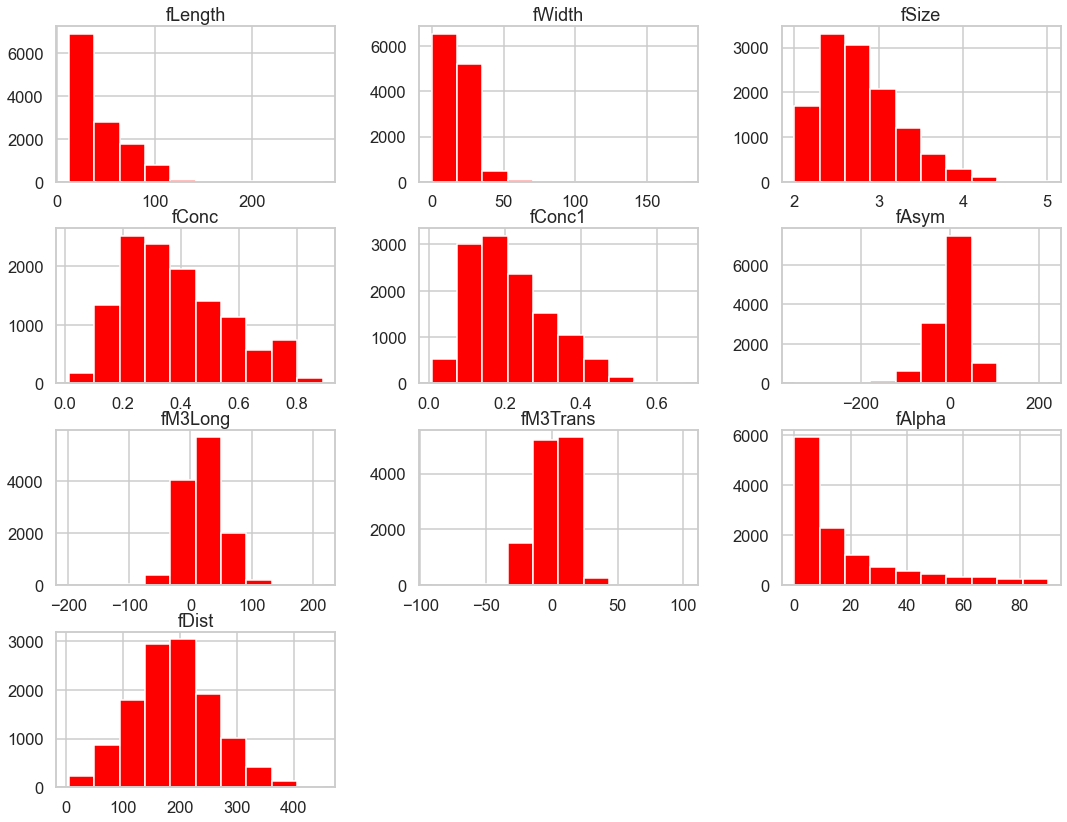

In [30]:
plt.rcParams['figure.figsize'] = 18, 14
df_gammas.hist(color="red")
plt.show()

The stored variables look like this for the background (cosmic ray hadrons):

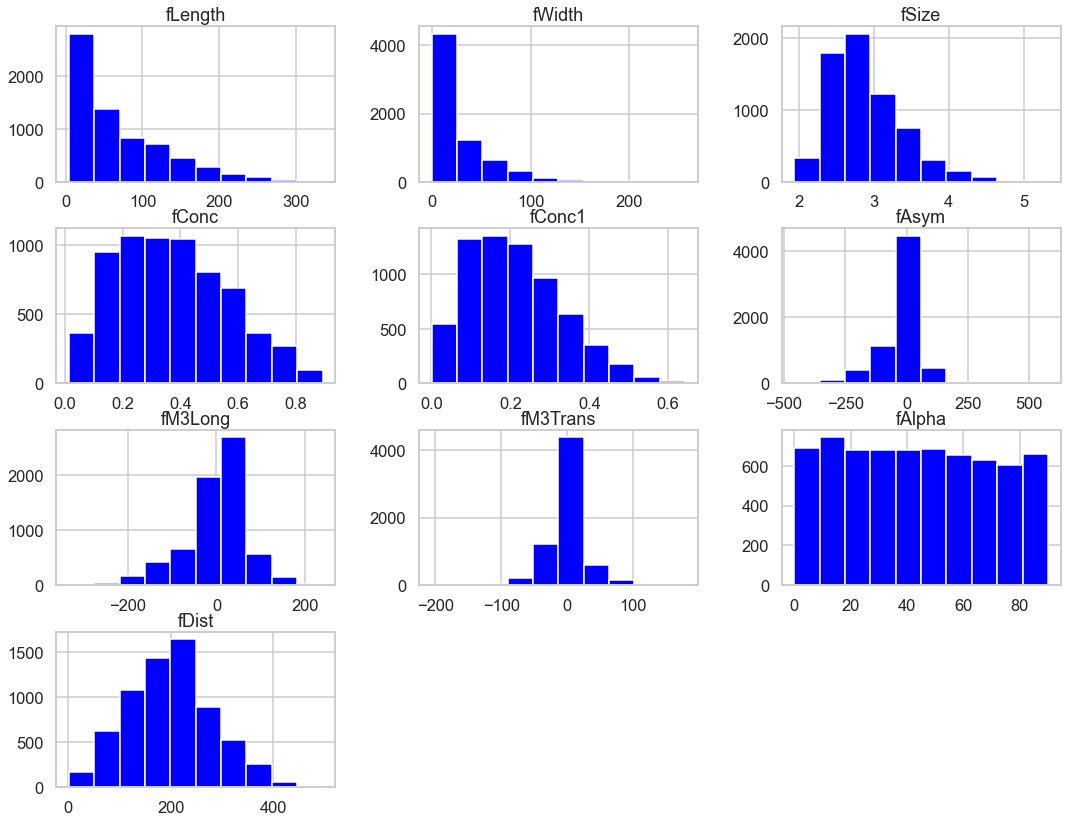

In [28]:
plt.rcParams['figure.figsize'] = 18,14
df_hadrons.hist(color="blue")
plt.show()

Some additional helpful notes. First, below is an example of plotting one of the variables as a 1D histogram for both signal and background on one plot using Matplotlib. Note that I am setting the number of bins and range by hand in order to control the bin size. 

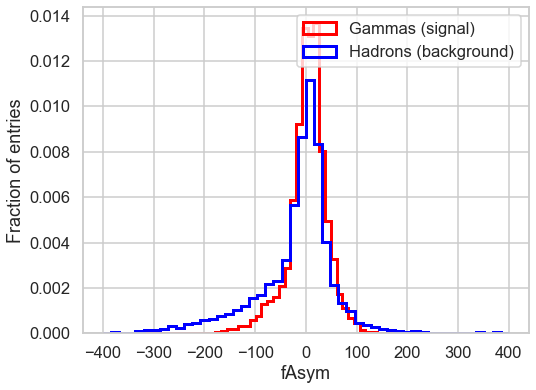

In [49]:
plt.rcParams['figure.figsize'] = 8, 6
plt.hist(df_gammas["fAsym"], bins=50,  density=True, histtype='step', lw=3, color = "red", label="Gammas (signal)") 
plt.hist(df_hadrons["fAsym"], bins=50, range=(-400,400), density=True, histtype='step', lw=3, color = "blue", label="Hadrons (background)") 
plt.xlabel("fAsym")
plt.ylabel("Fraction of entries")
plt.legend(loc='upper right')

We can note that our sample of gammas has more entries than hadrons. In order to compare shapes and ignore overall normalization differences we can set the density flag to True. This will normalize both histograms to have an area of 1. It is often useful to make two plots for each variable, one normalized and one un-normalized.

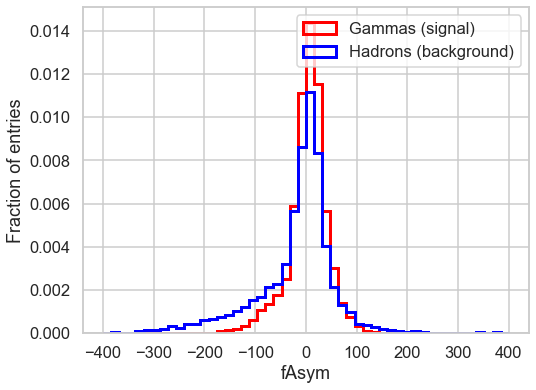

In [51]:
plt.rcParams['figure.figsize'] = 8, 6
plt.hist(df_gammas["fAsym"], bins=50, range=(-400,400), density=True, histtype='step', lw=3, color = "red", label="Gammas (signal)") 
plt.hist(df_hadrons["fAsym"], bins=50, range=(-400,400), density=True, histtype='step', lw=3, color = "blue", label="Hadrons (background)") 
plt.xlabel("fAsym")
plt.ylabel("Fraction of entries")
plt.legend(loc='upper right')

In addition to making the plot, the histogram objects also returns three helpful arrays. We can modify our code slightly to access these arrays. This will be necessary when completing the project. Here is an example:

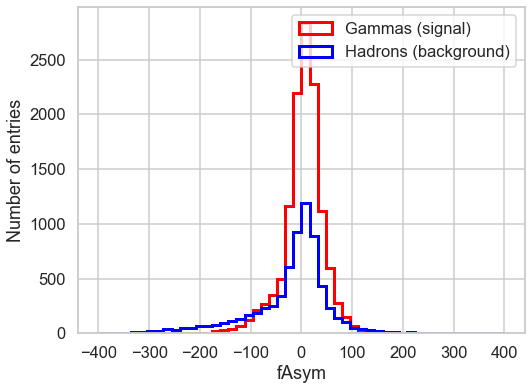

In [52]:
plt.rcParams['figure.figsize'] = 8, 6
g_fAsym_n, g_fAsym_bins, g_fAsym_patches  = plt.hist(df_gammas["fAsym"], bins=50, range=(-400,400), density=False, histtype='step', lw=3, color = "red", label="Gammas (signal)") 
h_fAsym_n, h_fAsym_bins, h_fAsym_patches  = plt.hist(df_hadrons["fAsym"], bins=50, range=(-400,400), density=False, histtype='step', lw=3, color = "blue", label="Hadrons (background)") 
plt.xlabel("fAsym")
plt.ylabel("Number of entries")
plt.legend(loc='upper right')

You can see that the plot looks the same, but we now also have useful arrays:

In [39]:
# The first array contains the number of entries in each bin.
g_fAsym_n

array([789., 596., 593., 859., 609., 693., 548., 429., 344., 312., 231.,
       233., 190., 157., 153.,  95.,  86.,  83.,  59.,  48.,  55.,  35.,
        27.,  31.,  27.])

In [40]:
# The second array contains the locations of the bin edges
g_fAsym_bins

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

## Project Expectations:

1. Use Jupyter notebooks (either with Anaconda or Google Colab) both as a tool for analyzing data and for presenting your methodology and results. Use Jupyter Markdown cells to explain what you are doing before each step and to comment on results.
1. Make sure your plots have proper axis labels. If you are plotting multiple curves or histograms on the same plot, make sure you include a legend.

## Project Steps:

### Part 1

Make normalized 1-D histograms comparing variable distributions for signal (gamma) and background (hadron) events. Do this for all 10 variables. Experiment with modifying the number of bins to improve your ability to visualize the data. You may want to consider automating this (loop over each variable).

### Part 2

For each variable, determine a selection you could make which would increase the signal to background ratio (this is also known as a "cut" or "threshold"). For example, in the lecture slides we selected A>0.5 for a made-up variable. This cut removed a lot of background while still keeping most of the signal:

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/Classification.png" alt="Drawing" style="width: 300px;"/>

Determine this selection "by eye" by looking at your histograms from Part 1. Your selection could be a simple greater than or less then, or it could be a more complicated cut ($A<0.4$ and $A> 0.9$).

Make a table in markdown containing each variable and the corresponding cut. Next, given these selections, calculate the "signal efficiency" and the "background misidentification rate" for each variable and include these as columns in your table.

* Define "signal efficiency" = number of signal events remaining after making your cut divided by the total number of signal events. This represents the rate at which you would correctly classify signal events as being signal using your cut.
* Define "background misidentification rate" = number of background events remaining after making your cut divided by the total number of background events. This represents the rate at which you would mis-classify background events as being signal using your cut.

There a few ways that one could calculate efficiency. One could use numpy or pandas methods, or one could use a loop, or one could use the actual histogram object. For example, one could use the bin count array from the matplotlib histogram object. You can choose any method (or experiment with multiple methods).


### Part 3


For each pair of variables, calculate the Pearson Correlation Coefficient between those two variables using signal events and plot the result. Plot your correlation coefficients as a heatmap. See this [link](https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04) as an example. If you prefer, you can also do this calculation by-hand isntead of using pandas tools.

### Part 4

Make 2-D scatter plots comparing variable distributions for signal (gamma) and background (hadron) events. Choose four variables that you think will have good discrimination power. Plot all combinations of those variables (A vs B, A vs C, A vs D, B vs C, B vs D, C vs D) as 2-D scatter plots.

### Part 5

Look at your plots from Part 4 and pick one for which you can make a 2D cut (cut in both variables) in order to select signal and remove background. Perform this cut and calculate the signal efficiency and mis-identification rate. Add this to your table from Part 2.


### Part 6

For the two variables you selected in Part 5, plot a 2-D heatmaps as a function of the two variables (do this separately for signal and background).

### Part 7

Create a ROC curve for each of the four variables you selected in Part 4. Make one plot with four ROC curves comparing the separation power of the four variables you chose above. As described in the Class 1 lecture, a ROC curve is defined as follows:

* A ROC curve is a plot of background misidentication rate (mis-ID rate) as a function of signal efficiency (see definitions above). For a single cut, you can calculate one value of mis-ID rate and one efficiency value (this corresponds to a single dot on a ROC cuve). In order to make the curve, you must vary your cut. 
* Using the example plot from the lecture, one could calculate the signal and efficiency and mis-ID rate seperately for different cuts ($A>0.0$ , $A>0.1$ , $A>0.2$ , $A>0.3$ , $A>0.4$ , $A>0.5$ , $A>0.6$ , $A>0.7$ , $A>0.8$ , $A>0.9$ , $A>1.0$) and plot one point on the ROC curve for each cut.  

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/Classification.png" alt="Drawing" style="width: 300px;"/>

### Part 8 

Again choose the two variables you selected in part 5. Make a ROC plot by varying your cut on both of these  variables (simple box cuts). Define efficiency and mis-ID rate in the same way as before, but this time require that the event pass two cuts instead of one. Vary both of these cuts and plot signal efficiency and mis-ID rate for each combination of cuts. Compare your "2 variable ROC curve" to the 1 variable ROC curves from Part 7